In [12]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, f1_score, accuracy_score, recall_score, precision_score
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.manifold import TSNE
import matplotlib.patches as mpatches
import pickle

In [13]:
dataframe = pd.read_excel('Data Awal.xlsx')
dataframe.head()

,Nama,Email,Alamat Domisili,Provinsi Domisili,Kota Domisili,Kecamatan Domisili,Kelurahan Domisili,Alamat Ktp,Provinsi Ktp,Kota Ktp,...,Waktu Daftar,Tanggal Daftar,Bulan Daftar,Tahun Daftar,Status,Jenis Kelamin,Gaji Yang Diharapkan,Status Kelengkapan,Agama,Tahapan
0,Indriyani,yaniindri8298@gmail.com,Jl. Duri B VII No. 7 RT/003 RW/004,DKI Jakarta,Kota Jakarta Pusat,Gambir,Duri Pulo,Jl. Duri B VII No. 7 RT/003 RW/004,DKI Jakarta,Kota Jakarta Pusat,...,2022-02-22 06:24:11,2022-02-22,February,2022,BANK DATA,Perempuan,Rp 5.000.000 - Rp 6.000.000,Lengkap,Islam,Tolak
1,Indriyani,indriyani.indri294@gmail.com,Serua Residence Blok A1 E1 Jalan Cinangka Bojo...,Jawa Barat,Kota Depok,Bojongsari,Pondok Petir,Cidodol RT 013 / RW 006 Grogol Selatan Kebayor...,DKI Jakarta,Kota Jakarta Selatan,...,2022-02-17 13:16:28,2022-02-17,February,2022,BANK DATA,Perempuan,-,Tidak Lengkap,Islam,Tolak
2,Rima Rahmawati,rimaarahma@gmail.com,"Jl. Bendungan Hilir No. 13, Kel. Bendungan Hil...",Banten,Kota Tangerang Selatan,Ciputat,Ciputat,"Jl. Kusuma Bhakti No. 49, Kel. Kubu Gulai Banc...",Sumatera Barat,Kota Bukittinggi,...,2022-02-22 09:22:22,2022-02-22,February,2022,BANK DATA,Perempuan,Sesuai standar UMP/UMR daerah,Lengkap,Islam,Diajukan
3,Siti nuraisyah,ainursiti14@gmail.com,"Kp bambu baru, RT013/003",Banten,Kab. Tangerang,Pakuhaji,Rawa Boni,"Kp bambu baru, RT013/003",Banten,Kab. Tangerang,...,2022-02-12 16:07:05,2022-02-12,February,2022,BANK DATA,Perempuan,Sesuai standar UMP/UMR daerah,Lengkap,Islam,Diajukan
4,Fitrianah,Fitrianahhh14@gmail.com,Kp.keranggan,Banten,Kota Tangerang Selatan,Setu,Keranggan,Kp.keranggan,Banten,Kota Tangerang Selatan,...,2022-02-19 07:48:48,2022-02-19,February,2022,MITRA,Perempuan,Sesuai standar UMP/UMR daerah,Lengkap,Islam,Diajukan


In [14]:
dataframe.shape

(1155, 35)

In [15]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Nama                  1155 non-null   object 
 1   Email                 1155 non-null   object 
 2   Alamat Domisili       1121 non-null   object 
 3   Provinsi Domisili     1074 non-null   object 
 4   Kota Domisili         1074 non-null   object 
 5   Kecamatan Domisili    553 non-null    object 
 6   Kelurahan Domisili    551 non-null    object 
 7   Alamat Ktp            1107 non-null   object 
 8   Provinsi Ktp          1061 non-null   object 
 9   Kota Ktp              1061 non-null   object 
 10  Kecamatan Ktp         535 non-null    object 
 11  Kelurahan Ktp         534 non-null    object 
 12  Tempat Lahir          1124 non-null   object 
 13  Tanggal Lahir         1124 non-null   object 
 14  Usia                  1121 non-null   float64
 15  Telp 1               

In [16]:
dataframe.isnull().sum()

Nama                      0
Email                     0
Alamat Domisili          34
Provinsi Domisili        81
Kota Domisili            81
Kecamatan Domisili      602
Kelurahan Domisili      604
Alamat Ktp               48
Provinsi Ktp             94
Kota Ktp                 94
Kecamatan Ktp           620
Kelurahan Ktp           621
Tempat Lahir             31
Tanggal Lahir            31
Usia                     34
Telp 1                    1
Telp 2                  701
Tingkat Pendidikan       12
Institut Pendidikan      12
Bidang Pendidikan        12
Tahun Lulus              12
Nilai Akhir              12
Posisi Yang Dilamar       0
Level                     0
Pengalaman Pekerjaan      0
Waktu Daftar              0
Tanggal Daftar            0
Bulan Daftar              0
Tahun Daftar              0
Status                    0
Jenis Kelamin            31
Gaji Yang Diharapkan    511
Status Kelengkapan        0
Agama                    31
Tahapan                   0
dtype: int64

In [17]:
df = dataframe.drop(['Nama', 'Email', 'Alamat Domisili', 'Provinsi Domisili', 'Kecamatan Domisili', 'Kelurahan Domisili', 'Alamat Ktp', 'Provinsi Ktp', 'Kota Ktp', 'Kecamatan Ktp', 'Kelurahan Ktp', 'Tempat Lahir', 'Tanggal Lahir', 'Telp 1', 'Telp 2', 'Institut Pendidikan', 'Bidang Pendidikan', 'Tahun Lulus', 'Nilai Akhir', 'Level', 'Waktu Daftar', 'Tanggal Daftar', 'Bulan Daftar', 'Status', 'Tahun Daftar', 'Gaji Yang Diharapkan'], axis=1)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Kota Domisili         1074 non-null   object 
 1   Usia                  1121 non-null   float64
 2   Tingkat Pendidikan    1143 non-null   object 
 3   Posisi Yang Dilamar   1155 non-null   object 
 4   Pengalaman Pekerjaan  1155 non-null   object 
 5   Jenis Kelamin         1124 non-null   object 
 6   Status Kelengkapan    1155 non-null   object 
 7   Agama                 1124 non-null   object 
 8   Tahapan               1155 non-null   object 
dtypes: float64(1), object(8)
memory usage: 81.3+ KB


In [19]:
df.isnull().sum().sort_values(ascending=False)

Kota Domisili           81
Usia                    34
Jenis Kelamin           31
Agama                   31
Tingkat Pendidikan      12
Posisi Yang Dilamar      0
Pengalaman Pekerjaan     0
Status Kelengkapan       0
Tahapan                  0
dtype: int64

In [20]:
df['Kota Domisili'].fillna(df['Kota Domisili'].mode()[0],inplace=True)
df['Usia'].fillna(df['Usia'].mean(),inplace=True)
df['Tingkat Pendidikan'].fillna(df['Tingkat Pendidikan'].mode()[0],inplace=True)
df['Jenis Kelamin'].fillna(df['Jenis Kelamin'].mode()[0],inplace=True)
df['Agama'].fillna(df['Agama'].mode()[0],inplace=True)

In [21]:
df.isnull().sum().sort_values(ascending=False)

Kota Domisili           0
Usia                    0
Tingkat Pendidikan      0
Posisi Yang Dilamar     0
Pengalaman Pekerjaan    0
Jenis Kelamin           0
Status Kelengkapan      0
Agama                   0
Tahapan                 0
dtype: int64

In [22]:
persentase = df['Usia'].value_counts(normalize=True)
persentase

24.000000    0.116017
23.000000    0.104762
21.000000    0.104762
22.000000    0.094372
20.000000    0.087446
25.000000    0.074459
26.000000    0.064069
27.000000    0.052814
19.000000    0.049351
29.000000    0.039827
28.000000    0.038961
25.055308    0.029437
30.000000    0.025108
32.000000    0.022511
31.000000    0.018182
34.000000    0.013853
36.000000    0.011255
33.000000    0.010390
39.000000    0.007792
40.000000    0.006061
38.000000    0.006061
35.000000    0.004329
37.000000    0.004329
44.000000    0.002597
45.000000    0.001732
41.000000    0.001732
43.000000    0.001732
47.000000    0.001732
42.000000    0.001732
46.000000    0.000866
48.000000    0.000866
51.000000    0.000866
Name: Usia, dtype: float64

In [23]:
threshold = 0.025
B = persentase[persentase < threshold].index
A = persentase[persentase > threshold].index
B
A

Float64Index([              24.0,               23.0,               21.0,
                            22.0,               20.0,               25.0,
                            26.0,               27.0,               19.0,
                            29.0,               28.0, 25.055307760927743,
                            30.0],
             dtype='float64')

In [24]:
df['Usia'] = df['Usia'].replace(A, '<30')
df['Usia'] = df['Usia'].replace(B, '>30')

df['Usia']

0       <30
1       <30
2       <30
3       <30
4       <30
       ... 
1150    <30
1151    <30
1152    <30
1153    <30
1154    <30
Name: Usia, Length: 1155, dtype: object

In [25]:
persentase = df['Kota Domisili'].value_counts(normalize=True)
persentase

Kota Tangerang Selatan    0.400866
Kota Tangerang            0.140260
Kab. Tangerang            0.064935
Kota Depok                0.052814
Kota Jakarta Selatan      0.049351
                            ...   
Kota Cirebon              0.000866
Kota Yogyakarta           0.000866
Kab. Deli Serdang         0.000866
Kab. Banyumas             0.000866
Kab. Lebong               0.000866
Name: Kota Domisili, Length: 64, dtype: float64

In [26]:
threshold = 0.06
luar_kota = persentase[persentase < threshold].index
dalam_kota = persentase[persentase > threshold].index
luar_kota
dalam_kota

Index(['Kota Tangerang Selatan', 'Kota Tangerang', 'Kab. Tangerang'], dtype='object')

In [27]:
df['Kota Domisili'] = df['Kota Domisili'].replace(luar_kota, 'Luar wilayah Tangerang')
df['Kota Domisili'] = df['Kota Domisili'].replace(dalam_kota, 'Wilayah Tangerang')

df['Kota Domisili']

0       Luar wilayah Tangerang
1       Luar wilayah Tangerang
2            Wilayah Tangerang
3            Wilayah Tangerang
4            Wilayah Tangerang
                 ...          
1150         Wilayah Tangerang
1151         Wilayah Tangerang
1152    Luar wilayah Tangerang
1153    Luar wilayah Tangerang
1154    Luar wilayah Tangerang
Name: Kota Domisili, Length: 1155, dtype: object

In [28]:
df.head()

,Kota Domisili,Usia,Tingkat Pendidikan,Posisi Yang Dilamar,Pengalaman Pekerjaan,Jenis Kelamin,Status Kelengkapan,Agama,Tahapan
0,Luar wilayah Tangerang,<30,S1,Telemarketing,Ada,Perempuan,Lengkap,Islam,Tolak
1,Luar wilayah Tangerang,<30,S1,Telemarketing,Ada,Perempuan,Tidak Lengkap,Islam,Tolak
2,Wilayah Tangerang,<30,S1,Telemarketing,Ada,Perempuan,Lengkap,Islam,Diajukan
3,Wilayah Tangerang,<30,SMA/SMK,Telesales,Ada,Perempuan,Lengkap,Islam,Diajukan
4,Wilayah Tangerang,<30,SMA/SMK,Sales Marketing,Ada,Perempuan,Lengkap,Islam,Diajukan


In [29]:
for col in df:
    
    print(df[col].value_counts())

Wilayah Tangerang         700
Luar wilayah Tangerang    455
Name: Kota Domisili, dtype: int64
<30    1018
>30     137
Name: Usia, dtype: int64
SMA/SMK    815
S1         269
D3          71
Name: Tingkat Pendidikan, dtype: int64
Telesales          1021
Telemarketing       110
Sales Marketing      24
Name: Posisi Yang Dilamar, dtype: int64
Ada          974
Tidak ada    181
Name: Pengalaman Pekerjaan, dtype: int64
Perempuan    710
Laki-Laki    445
Name: Jenis Kelamin, dtype: int64
Lengkap          975
Tidak Lengkap    180
Name: Status Kelengkapan, dtype: int64
Islam                1088
Kristen Protestan      52
Kristen Katolik        10
Buddha                  4
Konghucu                1
Name: Agama, dtype: int64
Tolak       690
Diajukan    465
Name: Tahapan, dtype: int64


<AxesSubplot:ylabel='Tahapan'>

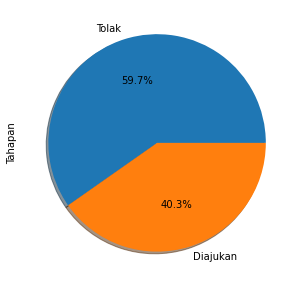

In [30]:
f,ax = plt.subplots(figsize=(15,5))
df['Tahapan'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)

Text(0.5, 1.0, 'Tolak vs Diajukan')

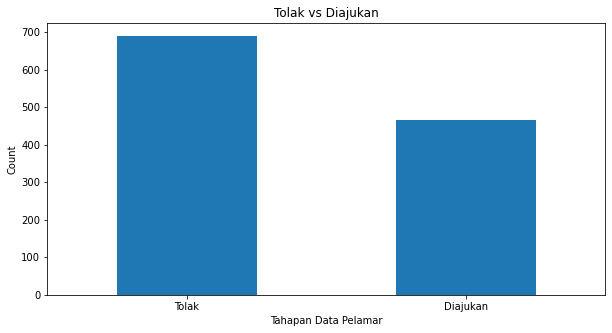

In [34]:
plt.figure(figsize=(10,5))
ax = df.Tahapan.value_counts().plot(kind = 'bar')
plt.xticks(rotation=0)
plt.xlabel("Tahapan Data Pelamar")
plt.ylabel("Count")
plt.title("Tolak vs Diajukan")

In [35]:
# encode column kota domisili
obj_kd = {'Luar wilayah Tangerang':0, 'Wilayah Tangerang':1}
df['Kota Domisili'] = df['Kota Domisili'].replace(obj_kd)

# encode column usia
obj_usia = {'>30':0, '<30':1}
df['Usia'] = df['Usia'].replace(obj_usia)

# encode column pengalaman pekerjaan
obj_pp = {'Tidak ada':0, 'Ada':1}
df['Pengalaman Pekerjaan'] = df['Pengalaman Pekerjaan'].replace(obj_pp)

# encode column jenis kelamin
obj_jk = {'Perempuan':0, 'Laki-Laki':1}
df['Jenis Kelamin'] = df['Jenis Kelamin'].replace(obj_jk)

# encode column status kelengkapan
obj_sk = {'Tidak Lengkap':0, 'Lengkap':1}
df['Status Kelengkapan'] = df['Status Kelengkapan'].replace(obj_sk)

# encode column tahapan
obj_tahapan = {'Tolak':0, 'Diajukan':1}
df['Tahapan'] = df['Tahapan'].replace(obj_tahapan)


In [36]:
le = LabelEncoder()
le.fit(df['Tingkat Pendidikan'])
list(le.classes_)

['D3', 'S1', 'SMA/SMK']

In [37]:
df['Tingkat Pendidikan']=le.transform(df['Tingkat Pendidikan'])

print(np.sort(df['Tingkat Pendidikan'].unique()))

[0 1 2]


In [38]:
le = LabelEncoder()
le.fit(df['Posisi Yang Dilamar'])
list(le.classes_)

['Sales Marketing', 'Telemarketing', 'Telesales']

In [39]:
df['Posisi Yang Dilamar']=le.transform(df['Posisi Yang Dilamar'])

print(np.sort(df['Posisi Yang Dilamar'].unique()))

[0 1 2]


In [40]:
le = LabelEncoder()
le.fit(df['Agama'])
list(le.classes_)

['Buddha', 'Islam', 'Konghucu', 'Kristen Katolik', 'Kristen Protestan']

In [41]:
df['Agama']=le.transform(df['Agama'])

print(np.sort(df['Agama'].unique()))

[0 1 2 3 4]


In [42]:
df.head()

,Kota Domisili,Usia,Tingkat Pendidikan,Posisi Yang Dilamar,Pengalaman Pekerjaan,Jenis Kelamin,Status Kelengkapan,Agama,Tahapan
0,0,1,1,1,1,0,1,1,0
1,0,1,1,1,1,0,0,1,0
2,1,1,1,1,1,0,1,1,1
3,1,1,2,2,1,0,1,1,1
4,1,1,2,0,1,0,1,1,1


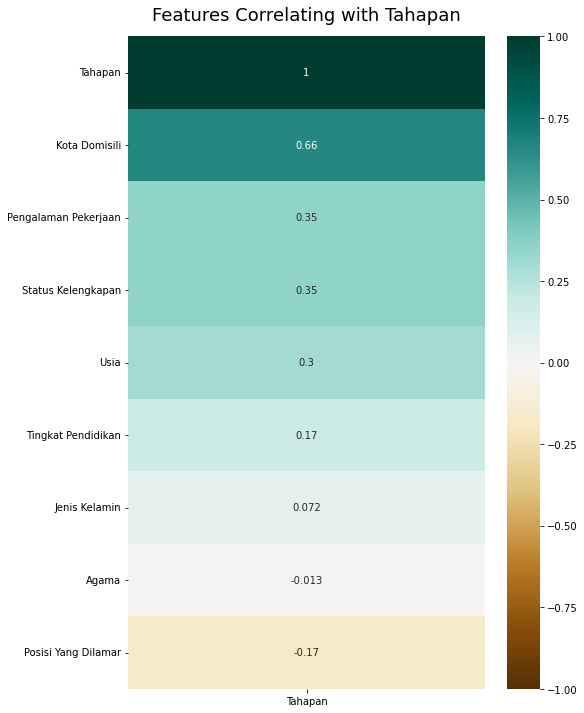

In [43]:
plt.figure(figsize=(8, 12))
heatmap = sn.heatmap(df.corr()[['Tahapan']].sort_values(by='Tahapan', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Tahapan', fontdict={'fontsize':18}, pad=16);

In [44]:
X = df.drop(['Jenis Kelamin', 'Agama', 'Tahapan'], axis=1)

y = df['Tahapan']

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [48]:
clf = RandomForestClassifier(random_state=42, max_features='auto', min_samples_leaf=2, n_estimators= 50, max_depth=4, criterion='entropy')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test,y_pred))
print("Recall Score:", recall_score(y_test, y_pred))
print("Precision Score:", precision_score(y_test, y_pred))

[[194   6]
 [  0 147]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       200
           1       0.96      1.00      0.98       147

    accuracy                           0.98       347
   macro avg       0.98      0.98      0.98       347
weighted avg       0.98      0.98      0.98       347

Accuracy Score: 0.9827089337175793
Recall Score: 1.0
Precision Score: 0.9607843137254902


In [49]:
feature_importance_df = pd.DataFrame(X_train.columns, columns=["Feature"])
feature_importance_df["Importance"] = clf.feature_importances_
feature_importance_df.sort_values('Importance', ascending=False, inplace=True)
feature_importance_df = feature_importance_df.head(20)
feature_importance_df

,Feature,Importance
0,Kota Domisili,0.537007
5,Status Kelengkapan,0.180132
4,Pengalaman Pekerjaan,0.131210
1,Usia,0.113324
3,Posisi Yang Dilamar,0.024006
2,Tingkat Pendidikan,0.014321


Text(0.5, 1.0, 'Plot Feature Importances')

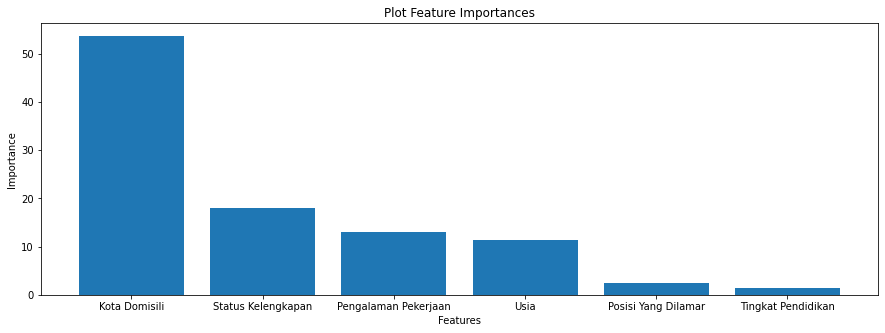

In [51]:
plt.figure(figsize=(15,5))
ax = feature_importance_df['Feature']
plt.bar(range(feature_importance_df.shape[0]), feature_importance_df['Importance']*100)
plt.xticks(range(feature_importance_df.shape[0]), feature_importance_df['Feature'], rotation = 0)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Plot Feature Importances")

In [54]:
pickle_out = open("model.pkl", "wb")
pickle.dump(clf, pickle_out)
pickle_out.close()